In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('LoanExport.csv', low_memory=False)

In [3]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [4]:
col_name =df.columns[0]
df=df.rename(columns = {col_name:'CS'})
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CS                  291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

(291451, 28)

In [5]:
for col in ['FirstPaymentDate','MSA',
            'Occupancy','Channel','ProductType',
            'SellerName','PostalCode','ServicerName',
            'PPM','PropertyType','LoanPurpose',
            'NumBorrowers']:
    if col in df:
        del df[col]

<Axes: >

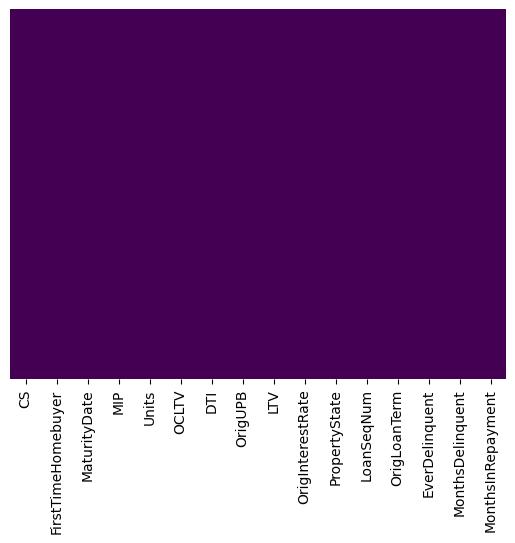

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CS                  291451 non-null  int64  
 1   FirstTimeHomebuyer  291451 non-null  object 
 2   MaturityDate        291451 non-null  int64  
 3   MIP                 291451 non-null  int64  
 4   Units               291451 non-null  int64  
 5   OCLTV               291451 non-null  int64  
 6   DTI                 291451 non-null  int64  
 7   OrigUPB             291451 non-null  int64  
 8   LTV                 291451 non-null  int64  
 9   OrigInterestRate    291451 non-null  float64
 10  PropertyState       291451 non-null  object 
 11  LoanSeqNum          291451 non-null  object 
 12  OrigLoanTerm        291451 non-null  int64  
 13  EverDelinquent      291451 non-null  int64  
 14  MonthsDelinquent    291451 non-null  int64  
 15  MonthsInRepayment   291451 non-nul

(291451, 16)

In [8]:
df.CS.unique()

array([  0, 335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471,
       476, 477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 64

In [9]:
df = df[df.CS != 0]
df.CS.unique()

array([335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471, 476,
       477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491, 492,
       493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505,
       506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
       519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
       532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544,
       545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557,
       558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570,
       571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583,
       584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596,
       597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609,
       610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622,
       623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635,
       636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 64

In [10]:
df.FirstTimeHomebuyer.unique()

array(['N', 'X', 'Y'], dtype=object)

In [11]:
df = df[df.FirstTimeHomebuyer != 'X']
df.FirstTimeHomebuyer.unique()

array(['N', 'Y'], dtype=object)

In [12]:
df['FirstTimeHomebuyer'].value_counts()

FirstTimeHomebuyer
N    183445
Y     29006
Name: count, dtype: int64

In [13]:
df = df.rename(columns = {'FirstTimeHomebuyer':'IsFirstTime'})
df['IsFirstTime'] = np.where(df['IsFirstTime'] == 'Y', 1, 0)
df['IsFirstTime'].value_counts()

IsFirstTime
0    183445
1     29006
Name: count, dtype: int64

In [14]:
df.MaturityDate.unique()

array([202903, 202904, 202902, 203008, 202908, 202910, 202901, 202909,
       202803, 203003, 202907, 202905, 202607, 203006, 203002, 202509,
       202911, 202611, 202703, 202706, 202502, 202906, 202612, 202705,
       203001, 202704, 202610, 202701, 202601, 202702, 202712, 202609,
       202709, 202912, 203004, 202806, 202802, 202605, 202602, 202811,
       202608, 203101, 202805, 203012, 202809, 202804, 202504, 203005,
       202405, 202810, 203308, 202808, 202406, 202708, 203007, 202812,
       202606, 202807, 203009, 202710, 202506, 202707, 202711, 203010,
       202603, 202503, 203211, 203111, 202512, 202402, 202511, 202510,
       202604, 202410, 202508, 202801, 203312, 202507, 202408, 203104,
       204111, 204302, 202501, 203212, 203011, 202411, 202403, 203304,
       202404, 203106, 203210, 203202, 202505, 202409], dtype=int64)

In [15]:
df.MIP.unique()

array([ 0, 30, 25, 12, 18, 35, 17, 22,  6, 20, 29, 14, 33, 16, 52, 36, 28,
       11, 45, 27, 10, 50, 47,  7, 24, 15, 37, 32, 26,  1, 13, 21, 23, 55,
        4], dtype=int64)

In [16]:
df.Units.unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [17]:
df['Units'].value_counts()

Units
1    208561
2      3205
3       342
4       341
0         2
Name: count, dtype: int64

In [18]:
df = df[df.Units != 0]

In [19]:
df.OCLTV.unique()

array([ 71,  79,  65,  64,  66,  95,  90,  89,  67,  72,  92,  80,  78,
        74,  87,  76,  68,  84,  73,  70,  97,  85,  28,  82,  69,  52,
        75,  62,  61,  63,  55,  83,  43,  37,  46,  77,  94,  60,  53,
        86,  50,  34,  93,  88,  54,  51,  47, 100,  57,  96,  48,  59,
        49,  30,  81,  56,  42,  40,  91,  58,  36,  98,  31,  32,  29,
        35,  38,  45,  25,  26,  33,  39,  41, 103,  44,  10,  18,  23,
        20,  22,  15,  24, 102, 101,  14,  16,  21,  27, 105,  19,   8,
         0, 104,  17, 110,  99,  12,   6,  13,   9,  11,   7], dtype=int64)

In [20]:
df.DTI.unique()

array([21, 28, 25, 22, 37,  0, 40, 41, 34, 20, 32, 23, 19, 27, 24, 29, 33,
       50, 38, 35, 31, 64, 39, 42, 16, 17, 13, 36, 46, 26, 45, 18, 43,  6,
       11, 57, 48, 44,  7, 49, 10, 14, 54,  8, 56, 30, 15, 59, 51, 52, 53,
       55, 12,  4, 65, 60,  9, 47,  2, 58,  5,  1, 61, 62,  3, 63],
      dtype=int64)

In [21]:
df = df[df.DTI != 0]

In [22]:
df.OrigUPB.unique()

array([116000,  96000,  66000, 125000,  65000,  79000, 111000, 110000,
        68000, 166000,  62000, 284000, 106000,  54000, 144000, 131000,
       123000, 147000,  70000,  88000, 126000, 214000,  85000, 121000,
       300000,  40000, 134000, 109000, 204000, 103000, 185000, 137000,
        73000,  57000,  92000, 108000, 170000, 206000, 152000,  56000,
        60000,  61000, 119000,  98000,  71000,  75000, 100000, 112000,
        99000,  90000, 102000, 239000, 178000, 261000,  86000, 154000,
        34000, 113000, 142000,  25000, 176000,  63000, 118000, 174000,
        76000,  69000, 169000, 135000, 140000, 149000, 164000,  47000,
       183000,  72000,  48000,  36000,  95000,  50000, 180000,  78000,
        83000, 232000, 128000, 168000, 145000, 222000, 120000, 211000,
       160000, 130000, 146000, 184000, 225000, 223000,  58000, 229000,
       156000, 101000, 136000,  80000, 306000,  44000, 161000,  51000,
        84000, 159000,  30000, 153000,  94000, 175000, 203000,  41000,
      

In [23]:
df.LTV.unique()

array([ 71,  79,  65,  64,  66,  95,  89,  67,  72,  80,  78,  74,  87,
        90,  76,  68,  84,  73,  70,  97,  85,  28,  82,  69,  52,  75,
        62,  61,  63,  83,  43,  92,  37,  46,  94,  60,  77,  53,  86,
        50,  34,  93,  88,  54,  51,  47, 100,  57,  55,  96,  48,  59,
        49,  30,  81,  56,  42,  40,  91,  58,  36,  98,  31,  32,  35,
        38,  45,  25,  26,  33,  39,  41,  44,  10,  18,  23,  20,  15,
        24,  29, 103,  14,  16,  21,  27,  22,  19,   8,  17,  12,   6,
        13,   9,  11,   7,   0], dtype=int64)

In [24]:
df = df[df.LTV != 0]

In [25]:
df.OrigInterestRate.unique()

array([ 6.875,  6.625,  6.5  ,  7.   ,  7.125,  7.625,  7.375,  8.625,
        7.5  ,  6.75 ,  8.25 ,  7.875,  6.25 ,  7.75 ,  7.25 ,  6.125,
        8.375,  6.375,  8.99 ,  8.5  ,  8.   ,  5.625,  7.2  ,  8.125,
        8.75 ,  9.   ,  5.875,  9.125,  6.99 ,  6.   ,  8.365,  6.95 ,
        8.875,  6.975,  7.3  ,  7.313,  9.625,  9.25 ,  5.75 ,  7.85 ,
        8.695,  7.775,  7.29 ,  7.405,  9.5  ,  9.375,  9.75 ,  7.13 ,
        7.1  ,  5.99 ,  6.999,  7.05 ,  7.055,  7.09 ,  6.785,  7.08 ,
        7.025,  7.7  ,  7.58 , 10.5  ,  7.55 ,  7.445,  9.875,  6.85 ,
        6.925,  6.9  ,  8.37 ,  5.375,  7.095,  7.19 ,  7.456,  9.675,
        7.475,  7.22 ,  7.17 ,  8.7  ,  7.301,  8.9  ,  7.15 , 10.   ,
        6.62 ,  7.325, 10.375,  7.8  ,  7.4  , 10.85 ,  7.185,  7.245,
        5.25 , 11.5  ,  6.94 ,  6.87 ,  7.65 ,  7.312,  7.28 ,  7.39 ,
        7.07 ,  5.5  ,  7.43 ,  7.48 ,  6.88 ,  8.45 ,  6.895,  6.3  ,
        7.49 ,  6.8  ,  6.63 ,  8.05 ,  7.275,  7.175,  7.225,  7.075,
      

In [26]:
df.OrigLoanTerm.unique()

array([360, 344, 348, 313, 316, 354, 327, 353, 322, 319, 332, 336, 338,
       312, 328, 351, 333, 359, 331, 337, 334, 357, 335, 345, 330, 350,
       341, 343, 325, 326, 346, 324, 347, 352, 356, 329, 355, 339, 317,
       349, 342, 304, 340, 301, 309, 315, 358, 306, 323, 321, 320, 302,
       318, 303, 307, 305, 361, 314, 308, 310, 311], dtype=int64)

In [27]:
df.EverDelinquent.unique()

array([0, 1], dtype=int64)

<Axes: xlabel='EverDelinquent', ylabel='count'>

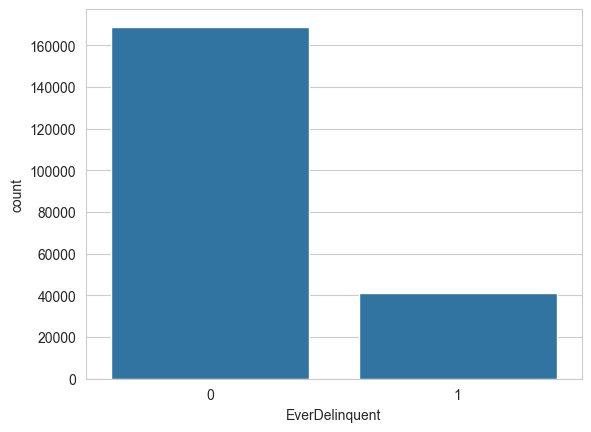

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='EverDelinquent', data=df)

In [29]:
df.MonthsDelinquent.unique()

array([  0,   1,  30,  10,   9,   3, 130,  50,  20, 102,   6,  22,   7,
        15,  33,  13,  18,   2,  31,  12,  21,  29,   5,  85,   4,  17,
        16,  27,  11,  28,  47,  41,  32,  34,  14,  49,  45,  37,  24,
        26,   8,  61,  25,  55,  48,  19,  74,  39, 151, 124, 105,  60,
        84,  46,  51,  99, 107,  73,  23, 170,  62,  86,  69,  38, 149,
        40, 106,  63, 112, 110,  54,  35,  77, 122,  66, 180,  58,  53,
       100, 116,  71,  78,  43,  56,  42, 163, 111, 141, 169,  59,  57,
        44,  82,  36,  91,  70,  79,  65,  64,  83, 134,  89, 150, 113,
       109,  52, 146, 104,  75, 118,  81, 133,  97, 103,  67, 101,  72,
       120,  92,  87,  93, 140,  96,  98, 132, 108, 115,  80, 121, 127,
       138,  88, 156, 119,  95, 129, 139, 165, 117,  90, 114, 157,  68,
        76, 160, 123, 148,  94, 143, 137, 152, 175, 131, 162, 179, 145,
       128, 126, 178, 172, 135, 125, 168, 159, 142, 161, 136, 147, 158,
       144, 171, 154], dtype=int64)

In [30]:
df.MonthsInRepayment.unique()

array([163, 165,  65,  55, 133,   9,  48,  72, 156,   4,  52,  16,  63,
        74,  45,  34,  60,   5,  28, 212,  36, 211,  62,   7, 183,  91,
        40, 209, 112,  29,  44,  38,  46,  56,  43,  31,   2,  23, 208,
        15,  21, 206,  39,  14,  54,  77,  59,  17, 210,  25, 136,  58,
        49, 135,  47,  53,  41,  22, 132,  26,  37, 166,  81,  19,  27,
        67,  89,  42,  50,  32, 124,  66,  33,  35,  64,  30, 186,  10,
        93,  69, 127,   6,  57,  51, 109,  20,  68, 121, 168, 189,  18,
        78, 194, 190, 158,  11,  61,  70,  73, 198,  75,  24, 174, 100,
       192,  12, 101,  71, 172,  76, 167, 137, 146,   8, 119, 164,  99,
        90, 143, 184, 123, 201, 118,  84, 199, 120,  80, 111,  13, 169,
       141,  96, 144, 202,  79, 149, 197,  92, 139, 148, 108, 145, 142,
        85, 116, 175, 125, 171, 177,  88, 106, 104, 157,  94,  83, 154,
        87,  86, 110, 130, 176, 181, 107, 117, 134, 203, 153, 128,  97,
       207,   3, 182, 105, 173, 188, 131,  98, 185, 102, 140,  9

In [31]:
# Create new variable for Credit Range since that is commonly what is looked at in the industry.
# New values = Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900)
df['CreditRange'] = pd.cut(df.CS,[550,650,700,750,1e6],4,labels=['Poor','Fair','Good','Excellent'])
df.CreditRange.unique()

[NaN, 'Poor', 'Fair', 'Good', 'Excellent']
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

<Axes: xlabel='CreditRange', ylabel='count'>

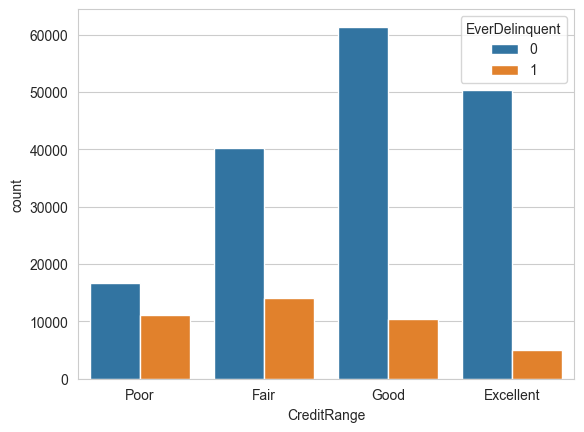

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='CreditRange', hue='EverDelinquent', data=df)

In [33]:
df.shape

(209882, 17)

In [34]:
df.isnull().sum()

CS                     0
IsFirstTime            0
MaturityDate           0
MIP                    0
Units                  0
OCLTV                  0
DTI                    0
OrigUPB                0
LTV                    0
OrigInterestRate       0
PropertyState          0
LoanSeqNum             0
OrigLoanTerm           0
EverDelinquent         0
MonthsDelinquent       0
MonthsInRepayment      0
CreditRange          506
dtype: int64

In [35]:
df.dropna(inplace=True)
df.shape

(209376, 17)

In [36]:
df['CreditRange'].value_counts()

CreditRange
Good         71842
Excellent    55308
Fair         54256
Poor         27970
Name: count, dtype: int64

In [37]:
# Create new variable for LTV Range
df['LTV_range'] = pd.cut(df.LTV,[0,25,50,1000],3,labels=['Low','Medium','High'])
df.LTV_range.unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

<Axes: xlabel='LTV_range', ylabel='count'>

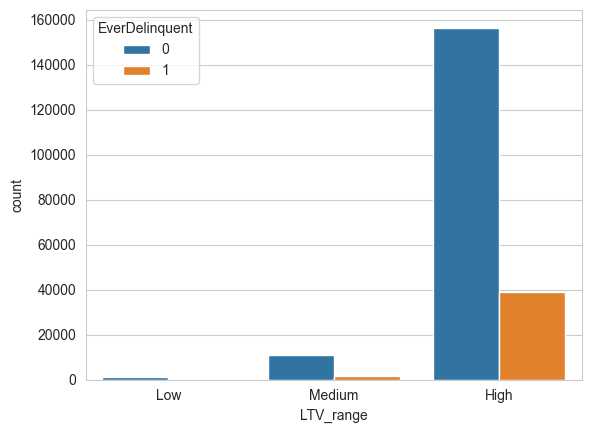

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='LTV_range', hue='EverDelinquent', data=df)

In [39]:
# Create new variable Repay range
df['Repay_range'] = pd.cut(df.MonthsInRepayment,[0,48,96,144,192,240],5,
                           labels=['Poor','Fair','Good', 'Very Good', 'Excellent'])

<Axes: xlabel='Repay_range', ylabel='count'>

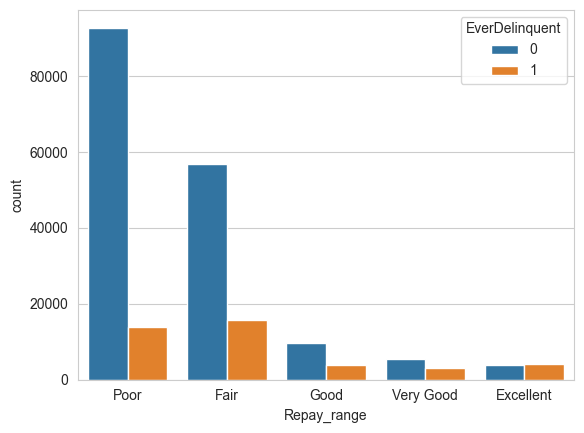

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Repay_range', hue='EverDelinquent', data=df)

In [41]:
df['Repay_range'].value_counts()

Repay_range
Poor         106692
Fair          72502
Good          13636
Very Good      8529
Excellent      8017
Name: count, dtype: int64

In [42]:
df.shape
df.info()
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
Index: 209376 entries, 2034 to 291450
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CS                 209376 non-null  int64   
 1   IsFirstTime        209376 non-null  int32   
 2   MaturityDate       209376 non-null  int64   
 3   MIP                209376 non-null  int64   
 4   Units              209376 non-null  int64   
 5   OCLTV              209376 non-null  int64   
 6   DTI                209376 non-null  int64   
 7   OrigUPB            209376 non-null  int64   
 8   LTV                209376 non-null  int64   
 9   OrigInterestRate   209376 non-null  float64 
 10  PropertyState      209376 non-null  object  
 11  LoanSeqNum         209376 non-null  object  
 12  OrigLoanTerm       209376 non-null  int64   
 13  EverDelinquent     209376 non-null  int64   
 14  MonthsDelinquent   209376 non-null  int64   
 15  MonthsInRepayment  209376 non-null  

False

In [44]:
df.to_csv('LoanExport(Cleaned).csv', index=False)